In [1]:
import numpy as np

In [3]:
folder_name = "fake1"
num_row = 10
num_col = 10
O_prob = 0.4
D_prob = 0.4
cap = 2000
length = 0.5
rhoj = 200
num_lane = 2
spd_lb = 20
spd_ub = 50

assign_horizon = 5
demand = 15

In [4]:
link_type = 'CTM'
node_type = 'FWJ'
connector_type = 'PQ'
O_type = 'DMOND'
D_type = 'DMDND'

In [5]:
file_attr = "MNM_input_"
node_file = file_attr + "node"
link_file = file_attr + "link"
snap_file = "Snap_graph"
od_file = file_attr + "od"
demand_file = file_attr + 'demand'

In [6]:
def add_node_str(node_num, type_str):
    return str(node_num) + ' ' + type_str + '\n'

In [7]:
def add_snap_str(link_num, from_node, to_node):
    return str(link_num) + ' ' + str(from_node) + ' ' + str(to_node) + '\n';

In [8]:
def add_link_str(link_num, link_type):
    # CTM 0.8 45 2200 200 1
    # PQ 1 99999 99999 99999 1
    if link_type != 'PQ':
        spd = np.round(np.random.random_sample() * (spd_ub - spd_lb)  + np.float(spd_lb))
        return str(link_num) + ' ' + str(link_type) + ' ' + str(length) + ' ' + str(spd) + ' ' + str(cap) + ' ' + str(rhoj) + ' ' + str(num_lane) + '\n'
    else:
        return str(link_num) + ' PQ 1 99999 99999 99999 1\n'

In [9]:
def add_OD(od_id, node_id):
    return str(od_id) + ' ' + str(node_id) + '\n'

In [10]:
link_str_list = []
node_str_list = []
snap_str_list = []
O_dict = dict()
D_dict = dict()
O_str_list = []
D_str_list = []

node_counter = 1
link_counter = 1
O_counter = 1
D_counter = 1

for i in xrange(num_row):
    for j in xrange(num_col):
        node_str_list.append(add_node_str(node_counter, node_type))
        if (j != num_col - 1):
            node1 = num_col * i + j + 1
            node2 = node1 + 1
            link_str_list.append(add_link_str(link_counter, link_type))
            snap_str_list.append(add_snap_str(link_counter, node1, node2))
            link_counter += 1
            link_str_list.append(add_link_str(link_counter, link_type))
            snap_str_list.append(add_snap_str(link_counter, node2, node1))   
            link_counter += 1
        if(i != num_row - 1):
            node1 = num_col * i + j + 1
            node2 = node1 + num_col
            link_str_list.append(add_link_str(link_counter, link_type))
            snap_str_list.append(add_snap_str(link_counter, node1, node2))
            link_counter += 1
            link_str_list.append(add_link_str(link_counter, link_type))
            snap_str_list.append(add_snap_str(link_counter, node2, node1)) 
            link_counter += 1
        node_counter += 1
            
for i in xrange(num_row):
    for j in xrange(num_col):
        node1 = num_col * i + j + 1
        if(np.random.random_sample() < O_prob or (i == 0 and j ==0)):
            node_str_list.append(add_node_str(node_counter, O_type))
            O_dict[O_counter] = node1
            O_str_list.append(add_OD(O_counter, node_counter))
            link_str_list.append(add_link_str(link_counter, connector_type))
            snap_str_list.append(add_snap_str(link_counter, node_counter, node1)) 
            link_counter += 1
            node_counter += 1
            O_counter += 1
        if(np.random.random_sample() < D_prob or (i == num_row -1 and j == num_col - 1)):
            node_str_list.append(add_node_str(node_counter, D_type))
            D_dict[D_counter] = node1
            D_str_list.append(add_OD(D_counter, node_counter))
            link_str_list.append(add_link_str(link_counter, connector_type))
            snap_str_list.append(add_snap_str(link_counter, node1, node_counter)) 
            link_counter += 1
            node_counter += 1
            D_counter += 1


In [11]:
print link_str_list
print node_str_list
print snap_str_list
print O_str_list
print D_str_list
print O_dict

['1 CTM 0.5 36.0 2000 200 2\n', '2 CTM 0.5 48.0 2000 200 2\n', '3 CTM 0.5 21.0 2000 200 2\n', '4 CTM 0.5 46.0 2000 200 2\n', '5 CTM 0.5 41.0 2000 200 2\n', '6 CTM 0.5 38.0 2000 200 2\n', '7 CTM 0.5 21.0 2000 200 2\n', '8 CTM 0.5 30.0 2000 200 2\n', '9 CTM 0.5 27.0 2000 200 2\n', '10 CTM 0.5 42.0 2000 200 2\n', '11 CTM 0.5 21.0 2000 200 2\n', '12 CTM 0.5 27.0 2000 200 2\n', '13 CTM 0.5 23.0 2000 200 2\n', '14 CTM 0.5 44.0 2000 200 2\n', '15 CTM 0.5 24.0 2000 200 2\n', '16 CTM 0.5 47.0 2000 200 2\n', '17 CTM 0.5 49.0 2000 200 2\n', '18 CTM 0.5 47.0 2000 200 2\n', '19 CTM 0.5 22.0 2000 200 2\n', '20 CTM 0.5 24.0 2000 200 2\n', '21 CTM 0.5 32.0 2000 200 2\n', '22 CTM 0.5 31.0 2000 200 2\n', '23 CTM 0.5 21.0 2000 200 2\n', '24 CTM 0.5 40.0 2000 200 2\n', '25 CTM 0.5 24.0 2000 200 2\n', '26 CTM 0.5 25.0 2000 200 2\n', '27 CTM 0.5 26.0 2000 200 2\n', '28 CTM 0.5 25.0 2000 200 2\n', '29 CTM 0.5 50.0 2000 200 2\n', '30 CTM 0.5 39.0 2000 200 2\n', '31 CTM 0.5 41.0 2000 200 2\n', '32 CTM 0.5 24.0

In [12]:
def add_demand_str(O, D):
    l = [str(O), str(D)]
    d = [str(demand) for i in range(assign_horizon)]
    l = l + d
    return ' '.join(l) + '\n'

In [13]:
# Origin_ID Destination_ID <demand by interval>
demand_str_list = []

for O, O_node in O_dict.iteritems():
    for D, D_node in D_dict.iteritems():
        if O_node != D_node:
            demand_str_list.append(add_demand_str(O, D))

In [16]:
print link_file
print node_file
print snap_file
print od_file
print demand_file

MNM_input_link
MNM_input_node
Snap_graph
MNM_input_od
MNM_input_demand


In [14]:
f = file(link_file, 'w')
f.write("#ID Type LEN(mile) FFS(mile/h) Cap(v/hour) RHOJ(v/miles) Lane\n")
for line in link_str_list:
    f.write(line)
f.close()

f = file(node_file, 'w')
f.write('#ID Type\n')
for line in node_str_list:
    f.write(line)
f.close()

f = file(snap_file, 'w')
f.write('# EdgeID FromNodeId ToNodeId\n')
for line in snap_str_list:
    f.write(line)
f.close()

f = file(od_file, 'w')
f.write('#Origin_ID <-> node_ID\n')
for line in O_str_list:
    f.write(line)
f.write('#Dest_ID <-> node_ID\n')
for line in D_str_list:
    f.write(line)
f.close()

f = file(demand_file, 'w')
f.write('#Origin_ID Destination_ID <demand by interval>\n')
for line in demand_str_list:
    f.write(line)
f.close()

In [15]:
print 'maximum_interval:', assign_horizon
print 'num_of_link:', len(link_str_list)
print 'num_of_node:', len(node_str_list)
print 'num_of_O:', len(O_dict)
print 'num_of_D:', len(D_dict)
print 'num_of_od:', len(demand_str_list)

maximum_interval: 5
num_of_link: 434
num_of_node: 174
num_of_O: 33
num_of_D: 41
num_of_od: 1337


In [23]:
print len(link_str_list)
print link_str_list[100].split(' ')[0]
# print node_str_list
print snap_str_list[100]
# print snap_str_list
# print O_str_list
# print D_str_list
# print O_dict

434
101
101 27 28



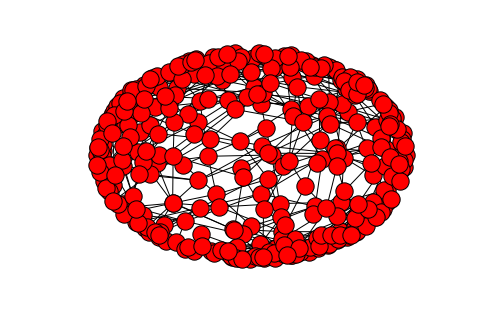

In [26]:
import networkx as nx
import matplotlib.pyplot as plt
edgelist = []
for line in snap_str_list:
    items = line.rstrip().split(" ")
    edgelist.append((items[1],items[2]))
                    
G=nx.Graph()
G.add_edges_from(edgelist)
nx.draw(G)
plt.show()